In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
import os
from pathlib import Path

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = '/content/drive/MyDrive/DOG VS CAT VS RABBIT'

In [4]:
test_dir = os.path.join(base_dir, 'testing')
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
import os

train_dir = '/content/drive/MyDrive/DOG VS CAT VS RABBIT/train'


Cat_dir = os.path.join(train_dir, 'Cat/')
Dog_dir = os.path.join(train_dir, 'Dog/')
Rabbit_dir = os.path.join(train_dir, 'Rabbit/')

print("Folder ditemukan?")
print("Cat:", os.path.exists(Cat_dir))
print("Dog:", os.path.exists(Dog_dir))
print("Rabbit:", os.path.exists(Rabbit_dir))


print("\nJumlah data train tiap kelas")
if os.path.exists(Cat_dir):
    print('Jumlah gambar Cat  :', len(os.listdir(Cat_dir)))
else:
    print('Folder Cat tidak ditemukan.')

if os.path.exists(Dog_dir):
    print('Jumlah gambar Dog :', len(os.listdir(Dog_dir)))
else:
    print('Folder Dog tidak ditemukan.')

if os.path.exists(Rabbit_dir):
    print('Jumlah gambar Rabbit  :', len(os.listdir(Rabbit_dir)))
else:
    print('Folder Rabbit tidak ditemukan.')

Folder ditemukan?
Cat: True
Dog: True
Rabbit: True

Jumlah data train tiap kelas
Jumlah gambar Cat  : 35
Jumlah gambar Dog : 35
Jumlah gambar Rabbit  : 35


In [6]:
train_Cat = os.listdir(Cat_dir)
train_Dog = os.listdir(Dog_dir)
train_Rabbit = os.listdir(Rabbit_dir)

validation_Cat = os.listdir(os.path.join(validation_dir, 'Cat/'))
validation_Dog = os.listdir(os.path.join(validation_dir, 'Dog/'))
validation_Rabbit = os.listdir(os.path.join(validation_dir, 'Rabbit/'))

In [7]:
train_datagen = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=30,
                 horizontal_flip=True,
                 shear_range=0.3,
                 fill_mode='nearest',
                 width_shift_range=0.2,
                 height_shift_range=0.2,
                 zoom_range=0.1
               )

val_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                horizontal_flip=True,
                shear_range=0.3,
                fill_mode='nearest',
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.1
              )


In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical'
)

Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai 99%")
      self.model.stop_training = True
callbacks = myCallback()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     3,699,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       100,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,824,987 (14.59 MB)

 Trainable params: 3,824,987 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',   # atau 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=15,
      epochs=30,
      validation_data=val_generator,
      validation_steps=1,
      verbose=1,
      callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
11/15 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3407 - loss: 1.2530

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.3438 - loss: 1.2362 - val_accuracy: 0.3000 - val_loss: 1.1115
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 648ms/step - accuracy: 0.2716 - loss: 1.1007 - val_accuracy: 0.2000 - val_loss: 1.1000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.2803 - loss: 1.0998 - val_accuracy: 0.6000 - val_loss: 1.0854
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 460ms/step - accuracy: 0.3761 - loss: 1.0938 - val_accuracy: 0.5000 - val_loss: 1.0789
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.4493 - loss: 1.0790 - val_accuracy: 0.4000 - val_loss: 0.9980
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.4602 - loss: 1.0710 - val_accuracy: 0.6000 - val_loss: 1.0671
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 637ms/step - accuracy: 0.4190 - loss: 1.0885 - val_accuracy: 0.5000 - val_loss: 1.0321
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.5251 - loss: 1.0677 - val_accuracy: 0.4000 - val

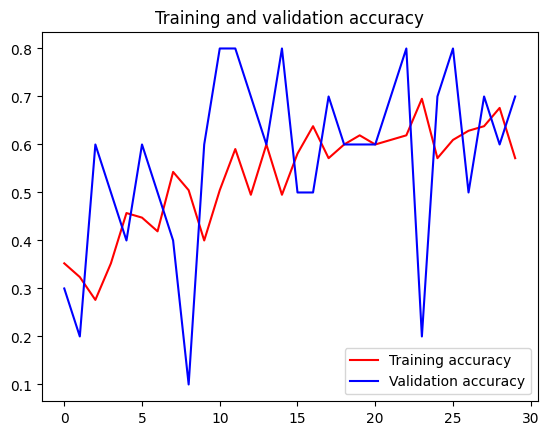

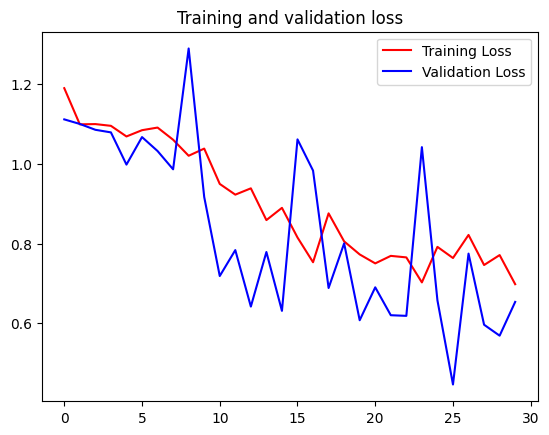

In [14]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc= 'best')
plt.show()

In [15]:
print(train_generator.class_indices)


{'Cat': 0, 'Dog': 1, 'Rabbit': 2}


Saving images (1).jpg to images (1) (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
images (1) (3).jpg
Predicted class probabilities: [[5.196056e-22 1.000000e+00 0.000000e+00]]
Shape of classes: (1, 3)
This image belongs to class Rabbit


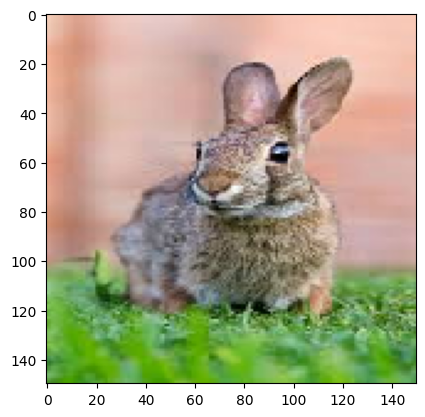

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)

    class_list = os.listdir(train_dir) # Gunakan daftar direktori latih untuk nama kelas

    print("Predicted class probabilities:", classes)
    print("Shape of classes:", classes.shape)

    predicted_class = np.argmax(classes[0]) # Gunakan np.argmax
    print('This image belongs to class', class_list[predicted_class])